## Affinity Propagation ##
Affinity Propagation is an unsupervised clustering algorithm based on the concept of "message passing" between data points.  This algorithm particularly does not require the number of clusters as input.  
It applies the concept of "exemplars," members of the input set that are representative of clusters.
The main drawback is, this algorithm is computationally expensive.

The algorithm proceeds by alternating between two message-passing steps, which update two matrices:

1. The "responsibility" matrix $R$ has values $r(i, k)$ that quantify how well-suited $x_k$ is to serve as the exemplar for $x_i$, relative to other candidate exemplars for $x_i$.

2. The "availability" matrix $A$ contains values $a(i, k)$ that represent how "appropriate" it would be for $x_i$ to pick $x_k$ as its exemplar, taking into account other points' preference for $x_k$ as an exemplar.

The values are updated through iterations.  Iterations are performed until either the cluster boundaries remain unchanged over a number of iterations, or some predetermined number (of iterations) is reached. The exemplars are extracted from the final matrices as those whose 'responsibility + availability' for themselves is positive (i.e. $(r(i,i)+a(i,i))>0$)

### Key parameters ###

**damping** - Damping factor (between 0.5 and 1) is the extent to which the current value is maintained relative to incoming values (weighted 1 - damping). This in order to avoid numerical oscillations when updating these values (messages).

**max_iter** - Maximum number of iterations. Default is 200.

**preference** - Preferences for each point - points with larger values of preferences are more likely to be chosen as exemplars. The number of exemplars, i.e. of clusters, is influenced by the input preferences value. If the preferences are not passed as arguments, they will be set to the median of the input similarities.

This preference value indicates how strongly a data point thinks itself should be an exemplar. It is the diagonal value of the similarity matrix, $S$. If we choose to leave this value unmodified, we will see almost no clustering as most data points choose to be an exemplar for themselves. If we haven’t got a priori knowledge of the data points it is advised to start with a preference equal to the median of the input similarities.
Intuitively, if we want Affinity Propagation to be less eager in splitting clusters we can set the preference value lower.


### Output from the algorithm ###
**labels** - Cluster labels are returned.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cluster import AffinityPropagation
import seaborn as sns
import sklearn.datasets as data

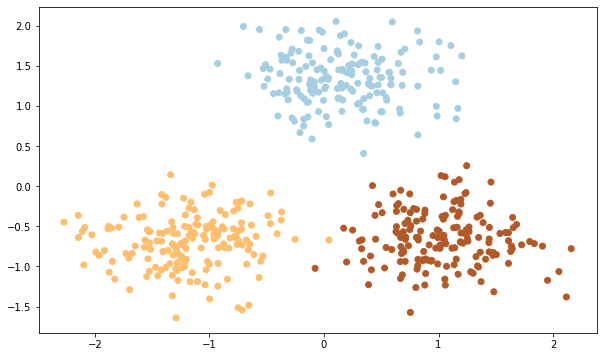

In [3]:
#Determine centroids
centers = [[0.5, 2], [-1, -1], [1.5, -1]]
#Create dataset
X, y = make_blobs(n_samples=500, centers=centers, 
                  cluster_std=0.5, random_state=0)
#Normalize the values
X = StandardScaler().fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')

c:\github_debasmita\ml2\deus_ex_machina\ml2\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


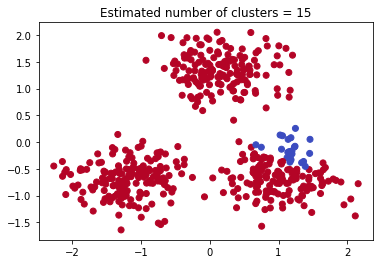

In [5]:
# AFfinity Propagation
afprop = AffinityPropagation(max_iter=250)
afprop.fit(X)
cluster_centers_indices = afprop.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)

P = afprop.predict(X)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', P))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.show()